# Proyecto 
## Pesos por dólar
Equipo 10 - Bedu

In [14]:
# Importamos librerías 

#import MLUtilities as utils

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import os 
import seaborn as sns 
import mpl_toolkits

In [69]:
# Cargamos conjunto de datos y exploramos sus características 
data = pd.read_csv("/content/BDM-SF60653.csv")
data.head()

,Date,Value
0,2021-05-11,19.9223
1,2021-05-10,20.1838
2,2021-05-09,20.1838
3,2021-05-08,20.1838
4,2021-05-07,20.2077


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10741 entries, 2021-05-11 to 1991-11-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   10741 non-null  float64
dtypes: float64(1)
memory usage: 167.8+ KB


In [63]:
X = data.iloc[:,0:].values
#x1 = X[:,0]
#y1 = X[:,1]
#plt.scatter(x1, y1)
#plt.show()
X

array([[19.9223],
       [20.1838],
       [20.1838],
       ...,
       [ 3.0718],
       [ 3.0712],
       [ 3.0735]])

In [49]:
# Calcular el número de clústers 
y = data['Value']
x = data.drop(['Date'], axis=1)

In [29]:
def particionar(entradas, salidas, porcentaje_entrenamiento, porcentaje_validacion, porcentaje_prueba):
    temp_size = porcentaje_validacion + porcentaje_prueba
    x_train, x_temp, y_train, y_temp = train_test_split(entradas, salidas, test_size =temp_size)
    if(porcentaje_validacion > 0):
        test_size = porcentaje_prueba/temp_size
        x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = test_size)
    else:
        return [x_train, None, x_temp, y_train, None, y_temp]
    return [x_train, x_val, x_test, y_train, y_val, y_test]

In [41]:
# Particionamos  en 60% entrenamiento, 10% validacion, 30% prueba
[x_train, x_val, x_test, y_train, y_val, y_test] = particionar(x,y,0.60, 0.10, 0.30)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(6444, 1)
(1074, 1)
(3223, 1)


In [22]:
data.describe()

,Value
count,10741.000000
mean,11.625882
std,4.825541
min,3.060600
25%,9.181200
50%,10.982000
75%,13.454900
max,25.118500


In [24]:
print(data.columns)

Index(['Date', 'Value'], dtype='object')


In [81]:
# Hacemos fit en la regresion
# regressor = LinearRegression()
# regressor.fit(x_train, y_train)
# Veamos la R^2
# regressor.score(x_test,y_test)

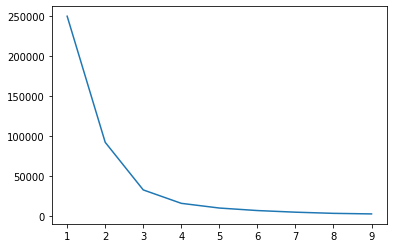

In [64]:
# Método del codo 
from sklearn.cluster import KMeans
var = []
for i in range(1,10): 
  kmeans = KMeans(n_clusters = i, init = "k-means++", random_state=15)
  kmeans.fit(X)
  var.append(kmeans.inertia_)

plt.plot(range(1,10), var)

[[13.0380573 ]
 [ 3.73719263]
 [19.3534304 ]
 [ 9.71020656]]


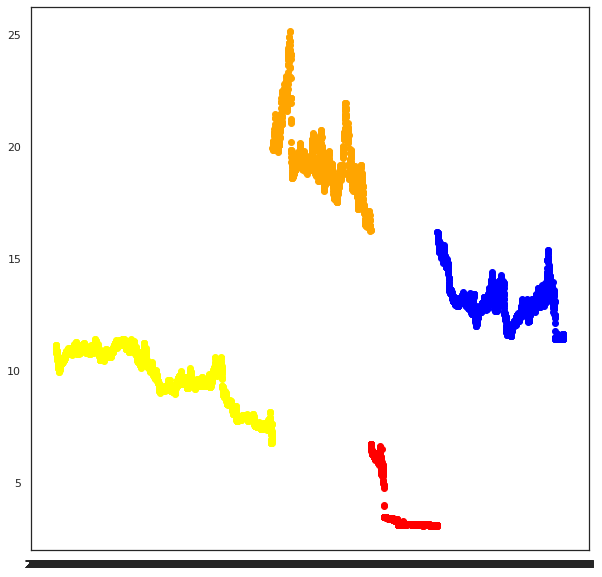

In [80]:
# Datos agrupados en clústers
#data = data.rename(columns={'Total Ventas': 'Total_Ventas'})

kmeans = KMeans(n_clusters=4, init="k-means++")
kmeans.fit(X)
print(kmeans.cluster_centers_)

clusters = kmeans.fit_predict(X)
data["label"] = clusters

plt.scatter(data.Date[data.label == 0], data.Value[data.label == 0], color = "yellow")
plt.scatter(data.Date[data.label == 1], data.Value[data.label == 1], color = "orange")
plt.scatter(data.Date[data.label == 2], data.Value[data.label == 2], color = "red")
plt.scatter(data.Date[data.label == 3], data.Value[data.label == 3], color = "blue")
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = "black")
plt.show()

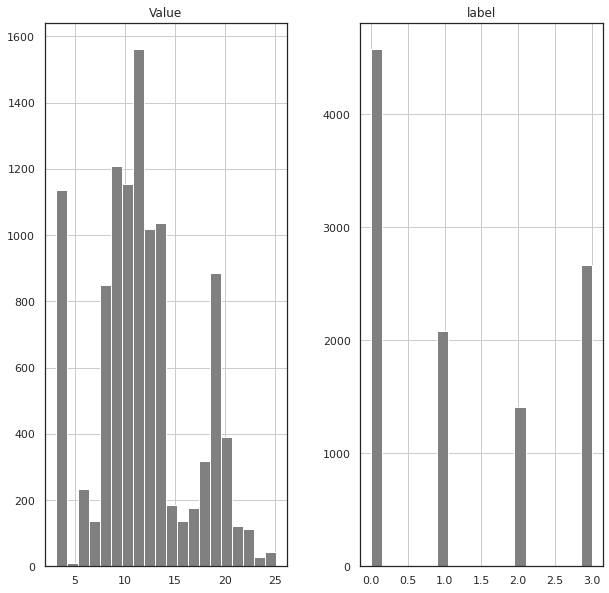

In [79]:
# Histograma tipo facet.grid para todas las variables 
sns.set(style="white", font_scale=1, rc={"figure.figsize":(10,10)})
ax = data.hist(bins=20, color="gray")